In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

## 1. Vampprior on Freyfaces

Download the loss data from GCP

In [2]:
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/freyfaces/vamp/log experiments/freyfaces/vamp/log.json

receiving file list ... done

sent 16 bytes  received 46 bytes  13.78 bytes/sec
total size is 1611986  speedup is 25999.77


In [3]:
with open('./experiments/freyfaces/vamp/log.json', 'r') as f:
    data = json.load(f)

data.keys()

dict_keys(['py/object', 'config', 'testloss', 'testre', 'testkl', 'trainloss', 'trainre', 'trainkl'])

**Collect test losses into a data frame**

In [4]:
losses = {
    'train_loss': data['trainloss'],
    'train_re': data['trainre'],
    'train_kl': data['trainkl'],
    'test_loss': data['testloss'],
    'test_re': data['testre'],
    'test_kl': data['testkl'],
}

df = pd.DataFrame(losses)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   train_loss  1000 non-null   float64
 1   train_re    1000 non-null   float64
 2   train_kl    1000 non-null   float64
 3   test_loss   1000 non-null   float64
 4   test_re     1000 non-null   float64
 5   test_kl     1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [5]:
df.head(5)

,train_loss,train_re,train_kl,test_loss,test_re,test_kl
0,655.977209,-655.976279,0.093848,3404.432617,-3403.672485,0.759955
1,567.264414,-567.259414,0.250159,3010.307739,-3008.681763,1.626071
2,527.704536,-527.695254,0.309525,2914.129639,-2912.708496,1.421038
3,522.417004,-522.405676,0.283610,2789.816162,-2788.078125,1.738322
4,501.050388,-501.032625,0.355166,2715.969482,-2714.120483,1.848678


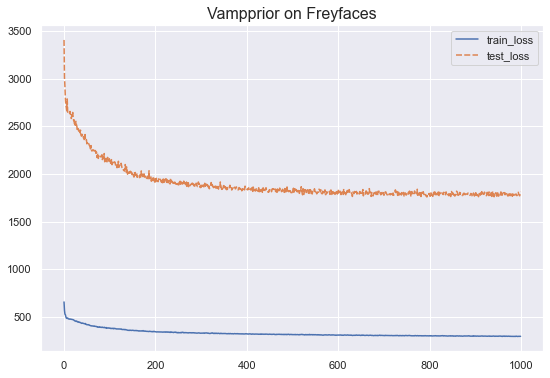

In [6]:
fig = plt.figure(figsize=(9, 6))
ax = fig.subplots()
sns.lineplot(data=df[['train_loss', 'test_loss']], ax=ax)
ax.set_title('Vampprior on Freyfaces', fontsize=16)
fig.savefig('./plots/vamp_freyfaces.pdf')

### Visualize generated images

We're interested in how the generated images look like after some points during training (100th, 200th, 400th, 600th, 1000th epochs)

Download generated images from GCP

In [14]:
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/freyfaces/vamp/images/epoch100.png experiments/freyfaces/images/
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/freyfaces/vamp/images/epoch200.png experiments/freyfaces/images/
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/freyfaces/vamp/images/epoch400.png experiments/freyfaces/images/
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/freyfaces/vamp/images/epoch600.png experiments/freyfaces/images/
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/freyfaces/vamp/images/epoch1000.png experiments/freyfaces/images/

receiving file list ... done

sent 16 bytes  received 55 bytes  15.78 bytes/sec
total size is 99189  speedup is 1397.03
receiving file list ... done
epoch200.png

sent 38 bytes  received 96273 bytes  27517.43 bytes/sec
total size is 99357  speedup is 1.03
receiving file list ... done
epoch400.png

sent 38 bytes  received 98212 bytes  28071.43 bytes/sec
total size is 101356  speedup is 1.03
receiving file list ... done
epoch600.png

sent 38 bytes  received 98424 bytes  28132.00 bytes/sec
total size is 101528  speedup is 1.03
receiving file list ... done
epoch1000.png

sent 38 bytes  received 98626 bytes  28189.71 bytes/sec
total size is 101685  speedup is 1.03


![freyfaces_100](./experiments/freyfaces/images/epoch100.png)
Epoch 100

![freyfaces_400](./experiments/freyfaces/images/epoch400.png)
Epoch 400

![freyfaces_400](./experiments/freyfaces/images/epoch1000.png)
Epoch 1000

## 2. Vampprior on MNIST

Download the loss data from GCP

In [7]:
!rsync -avz --no-owner --no-group cuongdd@dd2434-vm:~/VAE_project/our_code/experiments/mnist/vamp/log experiments/mnist/vamp/log.json

receiving file list ... done

sent 16 bytes  received 46 bytes  17.71 bytes/sec
total size is 2209556  speedup is 35638.00


In [8]:
with open('./experiments/mnist/vamp/log.json', 'r') as f:
    data = json.load(f)

data.keys()

dict_keys(['py/object', 'config', 'testloss', 'testre', 'testkl', 'trainloss', 'trainre', 'trainkl'])

In [9]:
losses = {
    'train_loss': data['trainloss'],
    'train_re': data['trainre'],
    'train_kl': data['trainkl'],
    'test_loss': data['testloss'],
    'test_re': data['testre'],
    'test_kl': data['testkl'],
}

df = pd.DataFrame(losses)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   train_loss  1000 non-null   float64
 1   train_re    1000 non-null   float64
 2   train_kl    1000 non-null   float64
 3   test_loss   1000 non-null   float64
 4   test_re     1000 non-null   float64
 5   test_kl     1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


**Plot the training and testing losses**

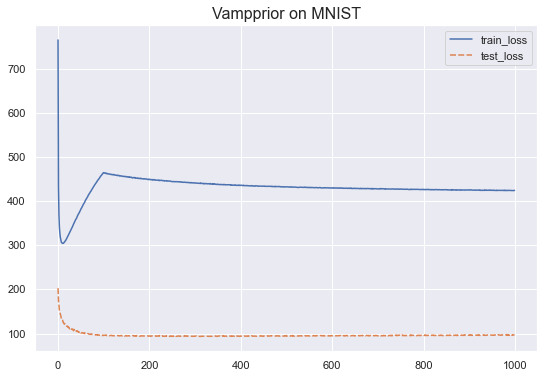

In [10]:
fig = plt.figure(figsize=(9, 6))
ax = fig.subplots()
sns.lineplot(data=df[['train_loss', 'test_loss']], ax=ax)
ax.set_title('Vampprior on MNIST', fontsize=16)
fig.savefig('./plots/vamp_mnist.pdf')

Text(0.5, 1.0, 'Vampprior on MNIST')

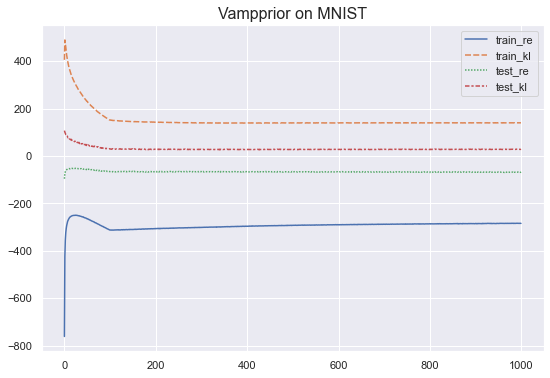

In [12]:
fig = plt.figure(figsize=(9, 6))
ax = fig.subplots()
sns.lineplot(data=df[['train_re', 'train_kl', 'test_re', 'test_kl']], ax=ax)
ax.set_title('Vampprior on MNIST', fontsize=16)
# fig.savefig('./plots/vamp_mnist.pdf')